<a href="https://colab.research.google.com/github/Jeanne11on/portfolio/blob/main/graph_Link_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Machine Learning in Network Science
Lab 2: Link prediction
"""
%matplotlib inline
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc


This code is written in Python and it uses the NetworkX library to read and analyze two different network files, "karate.gml" and "socfb-Caltech36.mtx".

The first line uses the nx.read_gml function to read the "karate.gml" file and store the network in the karate variable.
The second line uses the nx.read_edgelist function to read the "socfb-Caltech36.mtx" file and store the network in the facebook variable.
The third line uses the nx.connected_components function to find the connected components of the facebook network and stores the largest connected component in the nodes variable.
The fourth line uses the subgraph method to create a subgraph of facebook containing only the largest connected component.
The code then sets G equal to the karate network.
Finally, the code prints the number of nodes and edges in the G network.
The code provides a basic example of how to read network files and analyze their properties using the NetworkX library.

In [ ]:
# Read network files
karate = nx.read_gml("/content/karate.gml") 

facebook = nx.read_edgelist("/content/socfb-Caltech36.mtx") 

nodes = max(nx.connected_components(facebook), key=len)

facebook = facebook.subgraph(nodes) # has several connected components

# Choose a network
G = karate
print("The number of nodes: {}".format(G.number_of_nodes()))
print("The number of edges: {}".format(G.number_of_edges()))

The number of nodes: 34
The number of edges: 78


A Graph is a non-linear data structure consisting of vertices and edges. The vertices are sometimes also referred to as nodes and the edges are lines or arcs that connect any two nodes in the graph.


In [ ]:
print(nodes)

{'608', '341', '735', '322', '394', '575', '15', '421', '643', '97', '505', '439', '330', '183', '43', '706', '376', '346', '533', '349', '22', '646', '660', '625', '423', '503', '161', '51', '157', '746', '515', '550', '85', '431', '340', '582', '669', '200', '642', '328', '537', '218', '111', '386', '447', '121', '154', '556', '597', '28', '366', '249', '681', '313', '78', '544', '393', '180', '750', '371', '303', '165', '497', '284', '570', '246', '300', '10', '566', '547', '637', '448', '70', '96', '86', '561', '362', '228', '7', '347', '712', '209', '27', '738', '159', '276', '190', '195', '261', '222', '724', '317', '589', '345', '128', '384', '622', '50', '174', '98', '18', '133', '204', '396', '647', '134', '709', '655', '308', '257', '736', '306', '470', '184', '751', '719', '481', '170', '605', '368', '416', '103', '225', '1', '468', '158', '151', '524', '728', '510', '208', '210', '102', '179', '420', '632', '699', '124', '132', '320', '73', '61', '186', '456', '113', '189',

This code is written in Python and it uses the NetworkX and Matplotlib libraries to plot a graph.

The first line creates a Matplotlib figure with a specified size of 5 by 5.
The second line creates a random layout for the graph stored in the G variable using the nx.random_layout function with a seed of 19. The layout is stored in the pos variable.
The third line uses the nx.draw function to draw the graph G with the specified properties. The with_labels argument is set to False to not display node labels, pos is set to the pos variable to specify the layout, node_size is set to 50 to specify the size of the nodes, alpha is set to 0.6 to specify the transparency, and width is set to 0.6 to specify the width of the edges.
The fourth line uses the plt.show function to display the plot.
This code provides a basic example of how to plot a graph using NetworkX and Matplotlib in Python.

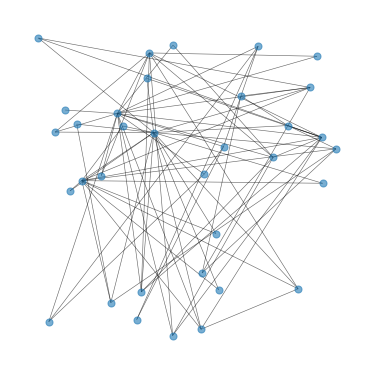

In [ ]:
# Plot graph
plt.figure(figsize=(5,5))

pos = nx.random_layout(G, seed=19)
nx.draw(G, with_labels=False,  pos = pos, node_size = 50, alpha = 0.6, width = 0.6)

plt.show()

In [ ]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


# Unsupervised link prediction

In this section, we adopt an unsupervised approach for the link prediction task. In particular, we implement various similarity metrics (seen in class) and use them to predict future edges. 

Preferential Attachment: This method is based on the idea that nodes in a network tend to connect to nodes that already have many connections. In other words, the more popular a node is, the more likely it is to receive new connections. To predict links, this method calculates the number of neighbors that each node has and calculates the product of the number of neighbors of the two nodes being considered for a link. The higher the product, the higher the probability of a link between the two nodes.** The main limitation is that you will only create connections between nodes with a lot of connections already. **

Jaccard Similarity: This method is based on the idea of finding similar nodes in a network. The similarity between two nodes is calculated based on the number of common neighbors they have divided by the total number of neighbors they have (both in common and not in common). This value is then used as a measure of the probability of a link between the two nodes.

Adamic-Adar: This method is similar to the Jaccard similarity method, but instead of simply counting the number of common neighbors, it takes into account the popularity of the common neighbors. Specifically, it calculates the sum of the inverse logarithm of the degree of the common neighbors and uses that as a measure of the probability of a link between the two nodes.

This code defines a function preferential_attachment1 that takes a graph G as an input and returns a dictionary PA of the preferential attachment scores between all pairs of nodes that are not connected by an edge in the graph.

The code first uses the non_edges function from the NetworkX library to get all pairs of nodes that are not connected by an edge in the graph. This function returns an iterator of non-existing edges in the graph.

Next, the code iterates through all the non-existing edges and calculates the preferential attachment score between each pair of nodes. The preferential attachment score is calculated as the product of the degree of the two nodes, which is the number of edges connecting to each node. The result is stored in the PA dictionary with the edge represented as a tuple (node1, node2) as the key and the preferential attachment score as the value.

In [ ]:
def preferential_attachement1(graph):
    PA = {}
    
    non_edges=nx.non_edges(graph)
    for edge in non_edges:
      PA[edge]=graph.degree(edge[0])*graph.degree(edge[1])
    
    return PA
    
preferential_attachement1(G)

{('0', '20'): 32,
 ('0', '30'): 64,
 ('0', '22'): 32,
 ('0', '26'): 32,
 ('0', '23'): 80,
 ('0', '25'): 48,
 ('0', '33'): 272,
 ('0', '9'): 32,
 ('0', '24'): 48,
 ('0', '32'): 192,
 ('0', '15'): 32,
 ('0', '18'): 32,
 ('0', '14'): 32,
 ('0', '29'): 64,
 ('0', '28'): 48,
 ('0', '16'): 32,
 ('0', '27'): 64,
 ('25', '9'): 6,
 ('25', '32'): 36,
 ('25', '15'): 6,
 ('25', '18'): 6,
 ('25', '28'): 9,
 ('25', '11'): 3,
 ('25', '19'): 9,
 ('25', '20'): 6,
 ('25', '2'): 30,
 ('25', '30'): 12,
 ('25', '4'): 9,
 ('25', '26'): 6,
 ('25', '21'): 6,
 ('25', '13'): 15,
 ('25', '14'): 6,
 ('25', '5'): 12,
 ('25', '10'): 9,
 ('25', '3'): 18,
 ('25', '6'): 12,
 ('25', '17'): 6,
 ('25', '22'): 6,
 ('25', '7'): 12,
 ('25', '33'): 51,
 ('25', '1'): 27,
 ('25', '16'): 6,
 ('25', '27'): 12,
 ('25', '8'): 15,
 ('25', '12'): 6,
 ('25', '29'): 12,
 ('9', '6'): 8,
 ('9', '17'): 4,
 ('9', '22'): 4,
 ('9', '7'): 8,
 ('9', '1'): 18,
 ('9', '24'): 6,
 ('9', '32'): 24,
 ('9', '15'): 4,
 ('9', '18'): 4,
 ('9', '31'): 1

This code defines a function Jaccard that takes a graph G as an input and returns a dictionary Jaccard of the Jaccard similarity scores between all pairs of nodes that are not connected by an edge in the graph.

The code first uses the non_edges function from the NetworkX library to get all pairs of nodes that are not connected by an edge in the graph. This function returns an iterator of non-existing edges in the graph.

Next, the code iterates through all the non-existing edges and calculates the Jaccard similarity score between each pair of nodes. The Jaccard similarity score is calculated as the ratio of the number of common neighbors of the two nodes to the total number of neighbors of the two nodes (both in common and not in common). This is achieved by using the common_neighbors function to get the common neighbors of the two nodes and the neighbors function to get the neighbors of each node. The result is stored in the Jaccard dictionary with the edge represented as a tuple (node1, node2) as the key and the Jaccard similarity score as the value.

Finally, the function returns the Jaccard dictionary.

In [ ]:
def Jaccard(graph):
    Jaccard = {}
    
    non_edges=nx.non_edges(graph)
    for edge in non_edges:
      inter=list(nx.common_neighbors(graph, edge[0], edge[1]))
      union=set(list(nx.neighbors(graph,edge[0]))+list(nx.neighbors(graph,edge[1])))
      if len(union)>0:
        Jaccard[edge]=len(inter)/len(union)
      else:
        Jaccard[edge]=0
    return Jaccard

Jaccard(G)

{('0', '20'): 0.0,
 ('0', '30'): 0.1111111111111111,
 ('0', '22'): 0.0,
 ('0', '26'): 0.0,
 ('0', '23'): 0.0,
 ('0', '25'): 0.05555555555555555,
 ('0', '33'): 0.13793103448275862,
 ('0', '9'): 0.058823529411764705,
 ('0', '24'): 0.05555555555555555,
 ('0', '32'): 0.12,
 ('0', '15'): 0.0,
 ('0', '18'): 0.0,
 ('0', '14'): 0.0,
 ('0', '29'): 0.0,
 ('0', '28'): 0.11764705882352941,
 ('0', '16'): 0.125,
 ('0', '27'): 0.05263157894736842,
 ('25', '9'): 0.0,
 ('25', '32'): 0.15384615384615385,
 ('25', '15'): 0.0,
 ('25', '18'): 0.0,
 ('25', '28'): 0.2,
 ('25', '11'): 0.0,
 ('25', '19'): 0.0,
 ('25', '20'): 0.0,
 ('25', '2'): 0.0,
 ('25', '30'): 0.0,
 ('25', '4'): 0.0,
 ('25', '26'): 0.0,
 ('25', '21'): 0.0,
 ('25', '13'): 0.0,
 ('25', '14'): 0.0,
 ('25', '5'): 0.0,
 ('25', '10'): 0.0,
 ('25', '3'): 0.0,
 ('25', '6'): 0.0,
 ('25', '17'): 0.0,
 ('25', '22'): 0.0,
 ('25', '7'): 0.0,
 ('25', '33'): 0.1111111111111111,
 ('25', '1'): 0.0,
 ('25', '16'): 0.0,
 ('25', '27'): 0.4,
 ('25', '8'): 0.0,
 

This code defines a function AdamicAdar that takes a graph G as an input and returns a dictionary AdamicAdar of the Adamic-Adar scores between all pairs of nodes that are not connected by an edge in the graph.

The code first uses the non_edges function from the NetworkX library to get all pairs of nodes that are not connected by an edge in the graph. This function returns an iterator of non-existing edges in the graph.

Next, the code iterates through all the non-existing edges and calculates the Adamic-Adar score between each pair of nodes. The Adamic-Adar score is calculated as the sum of the inverse of the log of the degree of each common neighbor of the two nodes. This is achieved by using the common_neighbors function to get the common neighbors of the two nodes and the degree function to get the degree of each common neighbor. The result is stored in the AdamicAdar dictionary with the edge represented as a tuple (node1, node2) as the key and the Adamic-Adar score as the value.

Finally, the function returns the AdamicAdar dictionary.

In [ ]:
import networkx as nx
import math

def AdamicAdar(graph):
    AdamicAdar = {}
    
    non_edges=nx.non_edges(graph)
    for edge in non_edges:
        common_neighbors = list(nx.common_neighbors(graph, edge[0], edge[1]))
        score = 0
        for neighbor in common_neighbors:
            score += 1 / math.log(graph.degree(neighbor))
        AdamicAdar[edge] = score
    
    return AdamicAdar

AdamicAdar(G)

{('0', '20'): 0,
 ('0', '30'): 1.0764545478730305,
 ('0', '22'): 0,
 ('0', '26'): 0,
 ('0', '23'): 0,
 ('0', '25'): 0.5581106265512472,
 ('0', '33'): 2.7110197222973085,
 ('0', '9'): 0.43429448190325176,
 ('0', '24'): 0.5581106265512472,
 ('0', '32'): 1.613740043014111,
 ('0', '15'): 0,
 ('0', '18'): 0,
 ('0', '14'): 0,
 ('0', '29'): 0,
 ('0', '28'): 0.9924051084544989,
 ('0', '16'): 1.4426950408889634,
 ('0', '27'): 0.43429448190325176,
 ('25', '9'): 0,
 ('25', '32'): 1.179445561110859,
 ('25', '15'): 0,
 ('25', '18'): 0,
 ('25', '28'): 0.5581106265512472,
 ('25', '11'): 0,
 ('25', '19'): 0,
 ('25', '20'): 0,
 ('25', '2'): 0,
 ('25', '30'): 0,
 ('25', '4'): 0,
 ('25', '26'): 0,
 ('25', '21'): 0,
 ('25', '13'): 0,
 ('25', '14'): 0,
 ('25', '5'): 0,
 ('25', '10'): 0,
 ('25', '3'): 0,
 ('25', '6'): 0,
 ('25', '17'): 0,
 ('25', '22'): 0,
 ('25', '7'): 0,
 ('25', '33'): 1.179445561110859,
 ('25', '1'): 0,
 ('25', '16'): 0,
 ('25', '27'): 1.531574161186449,
 ('25', '8'): 0,
 ('25', '12'): 0

In [ ]:
def predict_edges(metric, k=10):
    """
    param metric (dict): contains pairs of nodes as keys
                        and the similarity metric as value
    """
    
    # Shuffle randomly the entries of the dictionnary 
    # Fill in the blanks 

    # Retrieve and return top k most similar edges
    # Fill in the blanks 
    
    return metric.items()

metric =  ### fill in
predict_edges(metric)

The code first converts the dictionary of nodes and their similarity metric values into a list of tuple items, where each tuple contains the node pair as the first element and the similarity metric value as the second element. Then it shuffles the items randomly.

Next, it sorts the items based on the similarity metric value in descending order and returns the top k items.

Finally, it calls the predict_edges function with the Adamic-Adar similarity metric obtained from the graph G and returns the top k most similar edges based on the Adamic-Adar similarity metric.

In [ ]:
import random

def predict_edges(metric, k=10):
    """
    param metric (dict): contains pairs of nodes as keys
                        and the similarity metric as value
    """
    
    # Shuffle randomly the entries of the dictionnary
    items = list(metric.items())
    random.shuffle(items)

    # Retrieve and return top k most similar edges
    items.sort(key=lambda x: x[1], reverse=True)
    return items[:k]

metric = AdamicAdar(G)
predict_edges(metric)


[(('2', '33'), 4.719381261461351),
 (('0', '33'), 2.7110197222973085),
 (('33', '1'), 2.252921681630931),
 (('4', '5'), 1.9922605072935597),
 (('10', '6'), 1.9922605072935597),
 (('13', '7'), 1.8081984819901586),
 (('2', '31'), 1.6733425912309228),
 (('31', '23'), 1.6656249548734432),
 (('24', '23'), 1.631586747071319),
 (('0', '32'), 1.613740043014111)]